# Multiclass classification

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
vector_images, labels = mnist["data"].values, mnist["target"].values # convert from pandas to numpy
labels = labels.astype(int)

## Prepare the train dataset

In [4]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.3 #30% of the dataset

vector_images_train, vector_images_test, labels_train, labels_test = train_test_split(vector_images, labels, test_size=TEST_SIZE)

vector_images_test.shape

(21000, 784)

## Train the Stochastic Gradient Descent (SGD) classifier

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.fit(vector_images_train, labels_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


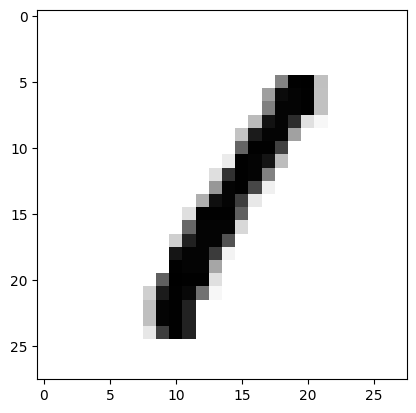

array([1])

In [10]:
import matplotlib.pyplot as plt

position = 3

plt.imshow(vector_images[position].reshape(28, 28), cmap="binary")
plt.show()

sgd_clf.predict([vector_images[position]])

## Cross-validation prediction

In [11]:
from sklearn.model_selection import cross_val_predict

labels_train_pred = cross_val_predict(sgd_clf, vector_images_train, labels_train, cv=3)

## Validate model

In [16]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(labels_train, labels_train_pred)
cfm

array([[4595,    0,   18,   16,   10,   11,   37,    3,  130,    3],
       [   1, 4816,   49,   24,   10,   28,   12,    6,  560,   10],
       [  63,   32, 3946,  137,   49,   18,   88,   49,  413,   18],
       [  16,   18,  139, 4203,    9,  124,   19,   24,  378,   46],
       [  33,   21,   42,   21, 3839,   62,   56,   31,  181,  481],
       [  74,   16,   36,  321,   82, 3208,   75,   17,  546,   49],
       [  42,   11,   82,   13,   24,   80, 4426,    0,  139,    2],
       [  25,   21,   60,   43,   59,   18,    4, 4572,  166,  189],
       [  37,   53,   80,  195,   33,   99,   26,    9, 4188,   62],
       [  32,   21,   34,   97,  234,   70,    2,  160,  465, 3808]])

In [13]:
from sklearn.metrics import classification_report

print(classification_report(labels_train, labels_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4823
           1       0.96      0.87      0.92      5516
           2       0.88      0.82      0.85      4813
           3       0.83      0.84      0.84      4976
           4       0.88      0.81      0.84      4767
           5       0.86      0.73      0.79      4424
           6       0.93      0.92      0.93      4819
           7       0.94      0.89      0.91      5157
           8       0.58      0.88      0.70      4782
           9       0.82      0.77      0.79      4923

    accuracy                           0.85     49000
   macro avg       0.86      0.85      0.85     49000
weighted avg       0.86      0.85      0.85     49000



## Use Seaborn to plot the confusion matrix through a heatmap
- Lines = the true labels
- Columns = the predicted labels

- The diagonal elements are the correct predictions
- The off-diagonal elements are the incorrect predictions

<Axes: >

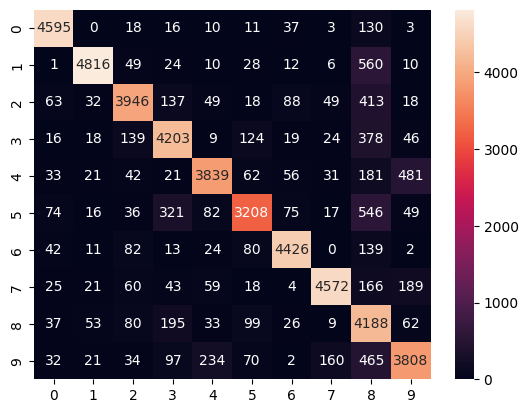

In [17]:
import seaborn as sns

sns.heatmap(cfm, annot=True, fmt="d")

# Normalize the confusion matrix to get the percentage of errors

<Axes: >

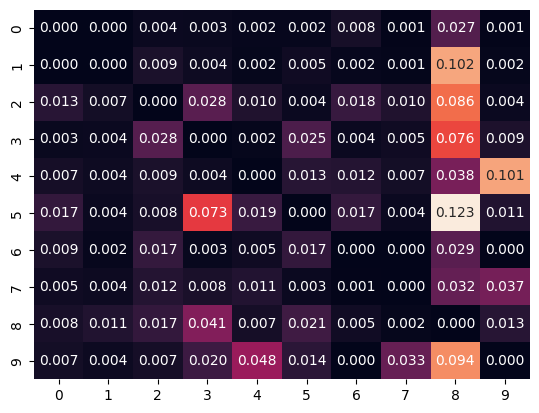

In [26]:
import numpy as np

cfm = confusion_matrix(labels_train, labels_train_pred)

row_sums = cfm.sum(axis=1, keepdims=True) # Sum of each row
norm_cfm = cfm / row_sums

np.fill_diagonal(norm_cfm, 0)

sns.heatmap(norm_cfm, annot=True, fmt=".3f", cbar=False)